In [126]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

In [127]:
colunas = [
    "Action",
    "Total Requests",
    "Failed Requests",
    "Average Time (ms)",
    "Total Time (ms)",
    "Protocol",
]

df_performance_data = pd.DataFrame()

protocols = ["REST", "SOAP", "gRPC", "GraphQL"]
protocol_colors = ["#8cc63f", "#9a8c7c", "#244b5a", "#e535ab"]
protocols_and_colors = dict(zip(protocols, protocol_colors))
labels_for_legends = [
    mpatches.Patch(color=color, label=protocol)
    for protocol, color in protocols_and_colors.items()
]


for protocol in protocols:
    df_temp = pd.read_csv(
        f"./data/out/performance_data_{protocol}.csv",
        dtype={
            "Action": str,
            "Total Requests": int,
            "Failed Requests": int,
            "Average Time (ms)": float,
            "Total Time (ms)": float,
            "Protocol": str,
        },
    )
    df_temp["Protocol"] = protocol
    df_performance_data = pd.concat([df_performance_data, df_temp])


df_performance_data.to_csv("./data/out/performance_data_all.csv", index=False)

# Converter as colunas de milissegundos para segundos
df_performance_data["Average Time (s)"] = (
    df_performance_data["Average Time (ms)"] / 1000
)
df_performance_data["Total Time (s)"] = df_performance_data["Total Time (ms)"] / 1000

df_performance_data.head()

,Action,Total Requests,Failed Requests,Average Time (ms),Total Time (ms),Protocol,Average Time (s),Total Time (s)
0,GetUsers,100,0,6.250,624.983,REST,0.006250,0.624983
1,GetSongs,100,0,14.086,1408.647,REST,0.014086,1.408647
2,GetPlaylists,100,0,9.699,969.919,REST,0.009699,0.969919
3,CreateUser,100,0,2.626,262.645,REST,0.002626,0.262645
4,CreateSong,100,0,2.212,221.186,REST,0.002212,0.221186


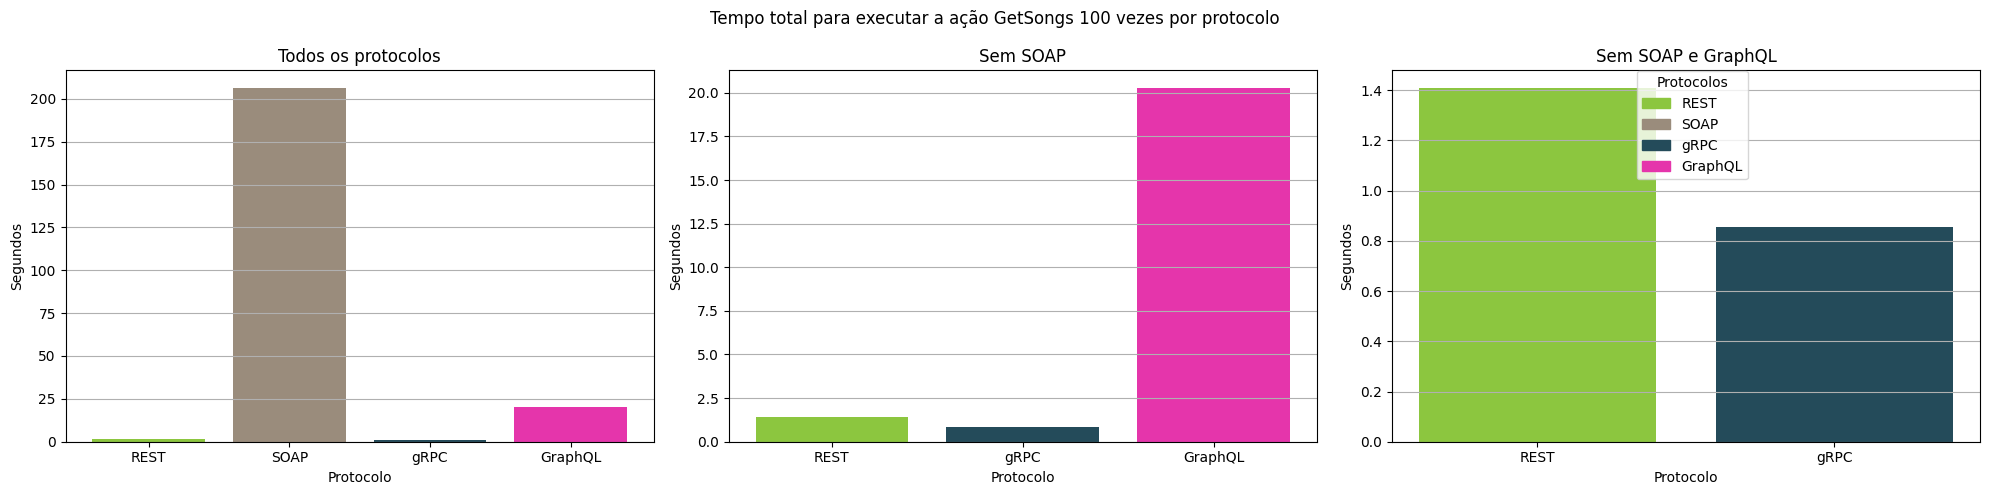

In [128]:
get_songs_data = df_performance_data[df_performance_data["Action"] == "GetSongs"]
get_songs_data_no_soap = get_songs_data[get_songs_data["Protocol"] != "SOAP"]
get_songs_data_no_soap_no_graphql = get_songs_data_no_soap[
    get_songs_data_no_soap["Protocol"] != "GraphQL"
]

data_for_subplots = [
    (get_songs_data, "Todos os protocolos", protocol_colors),
    (get_songs_data_no_soap, "Sem SOAP", ["#8cc63f", "#244b5a", "#e535ab"]),
    (get_songs_data_no_soap_no_graphql, "Sem SOAP e GraphQL", ["#8cc63f", "#244b5a"]),
]

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

fig.suptitle("Tempo total para executar a ação GetSongs 100 vezes por protocolo")

for i, (data, protocols_for_plot, bar_colors) in enumerate(data_for_subplots):
    axs[i].bar(data["Protocol"], data["Total Time (s)"], color=bar_colors)
    axs[i].set_xlabel("Protocolo")
    axs[i].set_ylabel("Segundos")
    axs[i].set_title(f"{protocols_for_plot}")
    axs[i].grid(axis="y")

fig.legend(
    labels_for_legends,
    protocols,
    loc="center right",
    title="Protocolos",
    bbox_to_anchor=(0.88, 0.75),
)

plt.tight_layout()
plt.show()

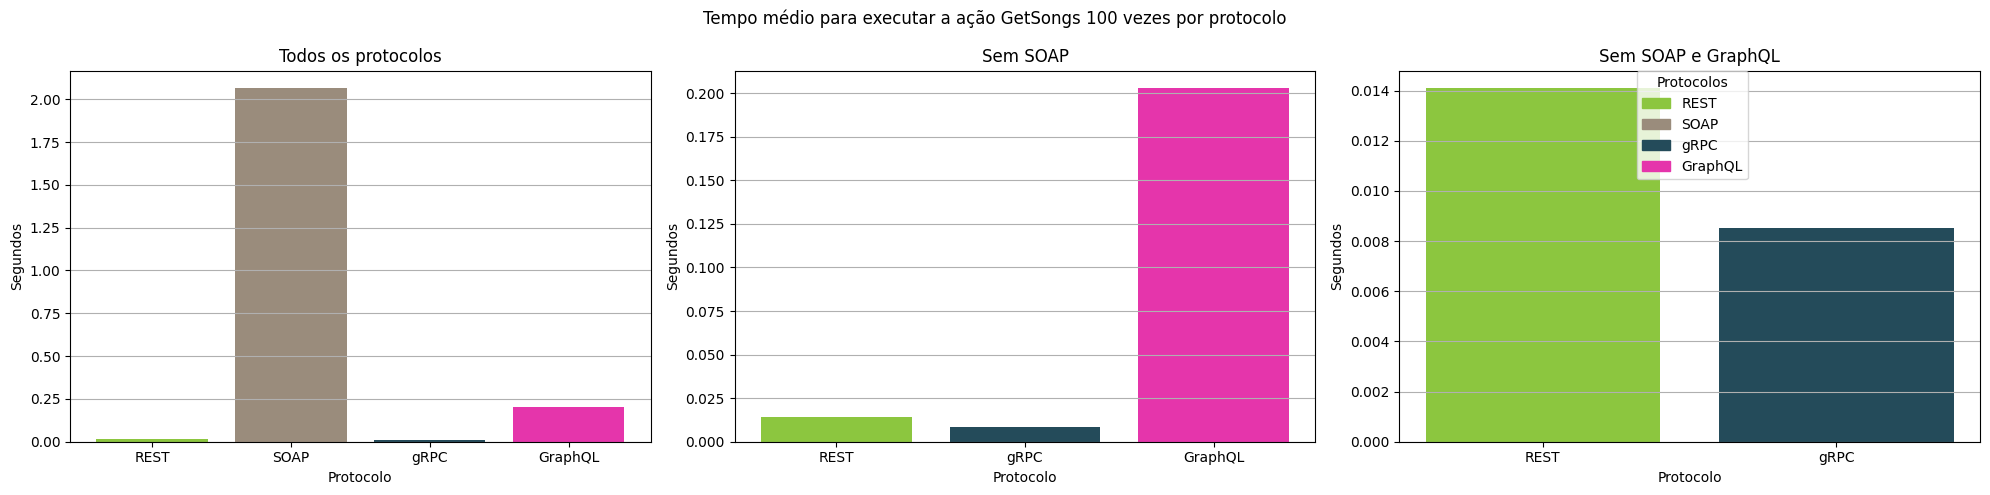

In [129]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

fig.suptitle("Tempo médio para executar a ação GetSongs 100 vezes por protocolo")

for i, (data, protocols_for_plot, bar_colors) in enumerate(data_for_subplots):
    axs[i].bar(data["Protocol"], data["Average Time (s)"], color=bar_colors)
    axs[i].set_xlabel("Protocolo")
    axs[i].set_ylabel("Segundos")
    axs[i].set_title(f"{protocols_for_plot}")
    axs[i].grid(axis="y")

fig.legend(
    labels_for_legends,
    protocols,
    loc="center right",
    title="Protocolos",
    bbox_to_anchor=(0.88, 0.75),
)

plt.tight_layout()
plt.show()

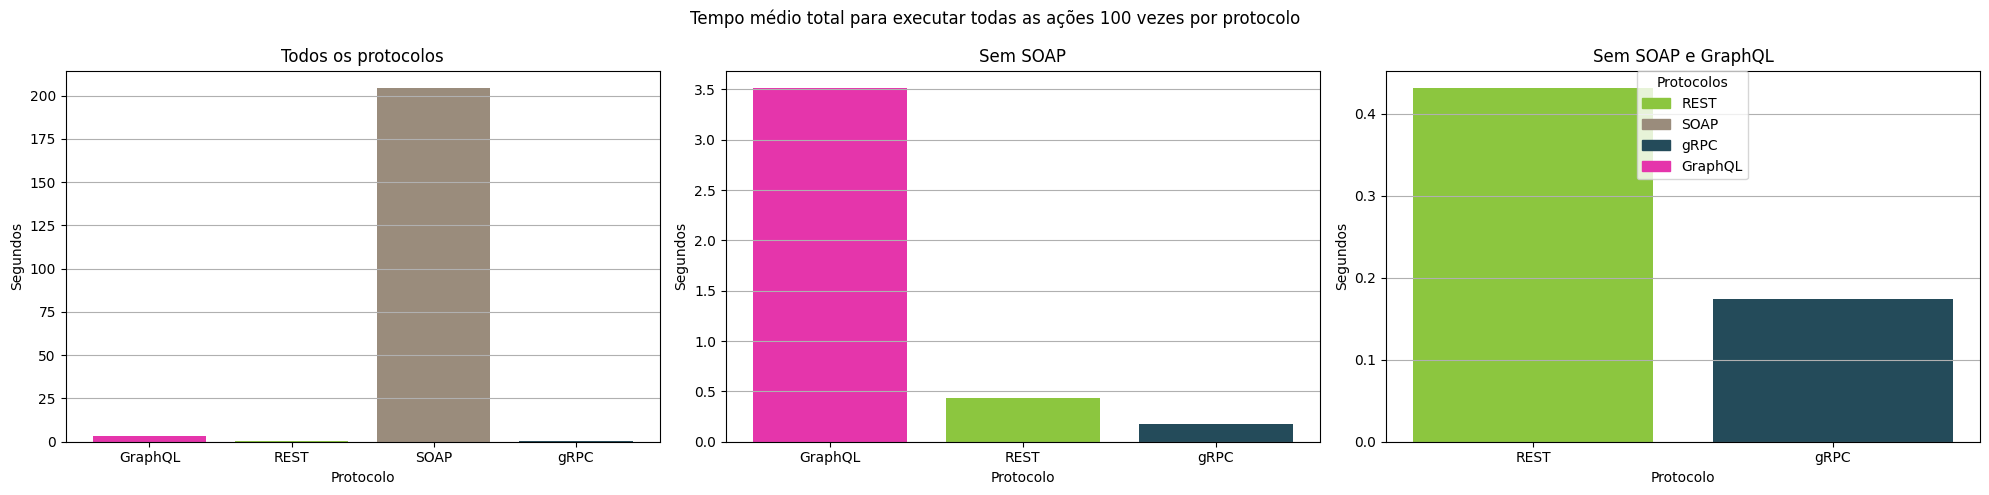

In [130]:
mean_total_time_per_protocol = (
    df_performance_data.groupby("Protocol")["Total Time (s)"].mean().reset_index()
)

mean_total_time_per_protocol_no_soap = (
    df_performance_data[df_performance_data["Protocol"] != "SOAP"]
    .groupby("Protocol")["Total Time (s)"]
    .mean()
    .reset_index()
)

mean_total_time_per_protocol_no_soap_no_graphql = (
    df_performance_data[
        (df_performance_data["Protocol"] != "SOAP")
        & (df_performance_data["Protocol"] != "GraphQL")
    ]
    .groupby("Protocol")["Total Time (s)"]
    .mean()
    .reset_index()
)

data_for_subplots = [
    (
        mean_total_time_per_protocol,
        "Todos os protocolos",
        ["#e535ab", "#8cc63f", "#9a8c7c", "#244b5a"],
    ),
    (
        mean_total_time_per_protocol_no_soap,
        "Sem SOAP",
        ["#e535ab", "#8cc63f", "#244b5a"],
    ),
    (
        mean_total_time_per_protocol_no_soap_no_graphql,
        "Sem SOAP e GraphQL",
        ["#8cc63f", "#244b5a"],
    ),
]

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

fig.suptitle("Tempo médio total para executar todas as ações 100 vezes por protocolo")

for i, (data, protocols_for_plot, bar_colors) in enumerate(data_for_subplots):
    axs[i].bar(data["Protocol"], data["Total Time (s)"], color=bar_colors)
    axs[i].set_xlabel("Protocolo")
    axs[i].set_ylabel("Segundos")
    axs[i].set_title(f"{protocols_for_plot}")
    axs[i].grid(axis="y")

fig.legend(
    labels_for_legends,
    protocols,
    loc="center right",
    title="Protocolos",
    bbox_to_anchor=(0.88, 0.75),
)

plt.tight_layout()
plt.show()

In [131]:
median_total_time_per_protocol = (
    df_performance_data.groupby("Protocol")["Total Time (s)"].median().reset_index()
)
variance_total_time_per_protocol = (
    df_performance_data.groupby("Protocol")["Total Time (s)"].var().reset_index()
)

median_total_time_per_protocol_no_soap = median_total_time_per_protocol[
    median_total_time_per_protocol["Protocol"] != "SOAP"
]
variance_total_time_per_protocol_no_soap = variance_total_time_per_protocol[
    variance_total_time_per_protocol["Protocol"] != "SOAP"
]

median_total_time_per_protocol_no_soap_no_graphql = (
    median_total_time_per_protocol_no_soap[
        (median_total_time_per_protocol_no_soap["Protocol"] != "GraphQL")
    ]
)
variance_total_time_per_protocol_no_soap_no_graphql = (
    variance_total_time_per_protocol_no_soap[
        (variance_total_time_per_protocol_no_soap["Protocol"] != "GraphQL")
    ]
)

variance_total_time_per_protocol_no_soap_no_graphql

,Protocol,Total Time (s)
1,REST,0.147156
3,gRPC,0.060796


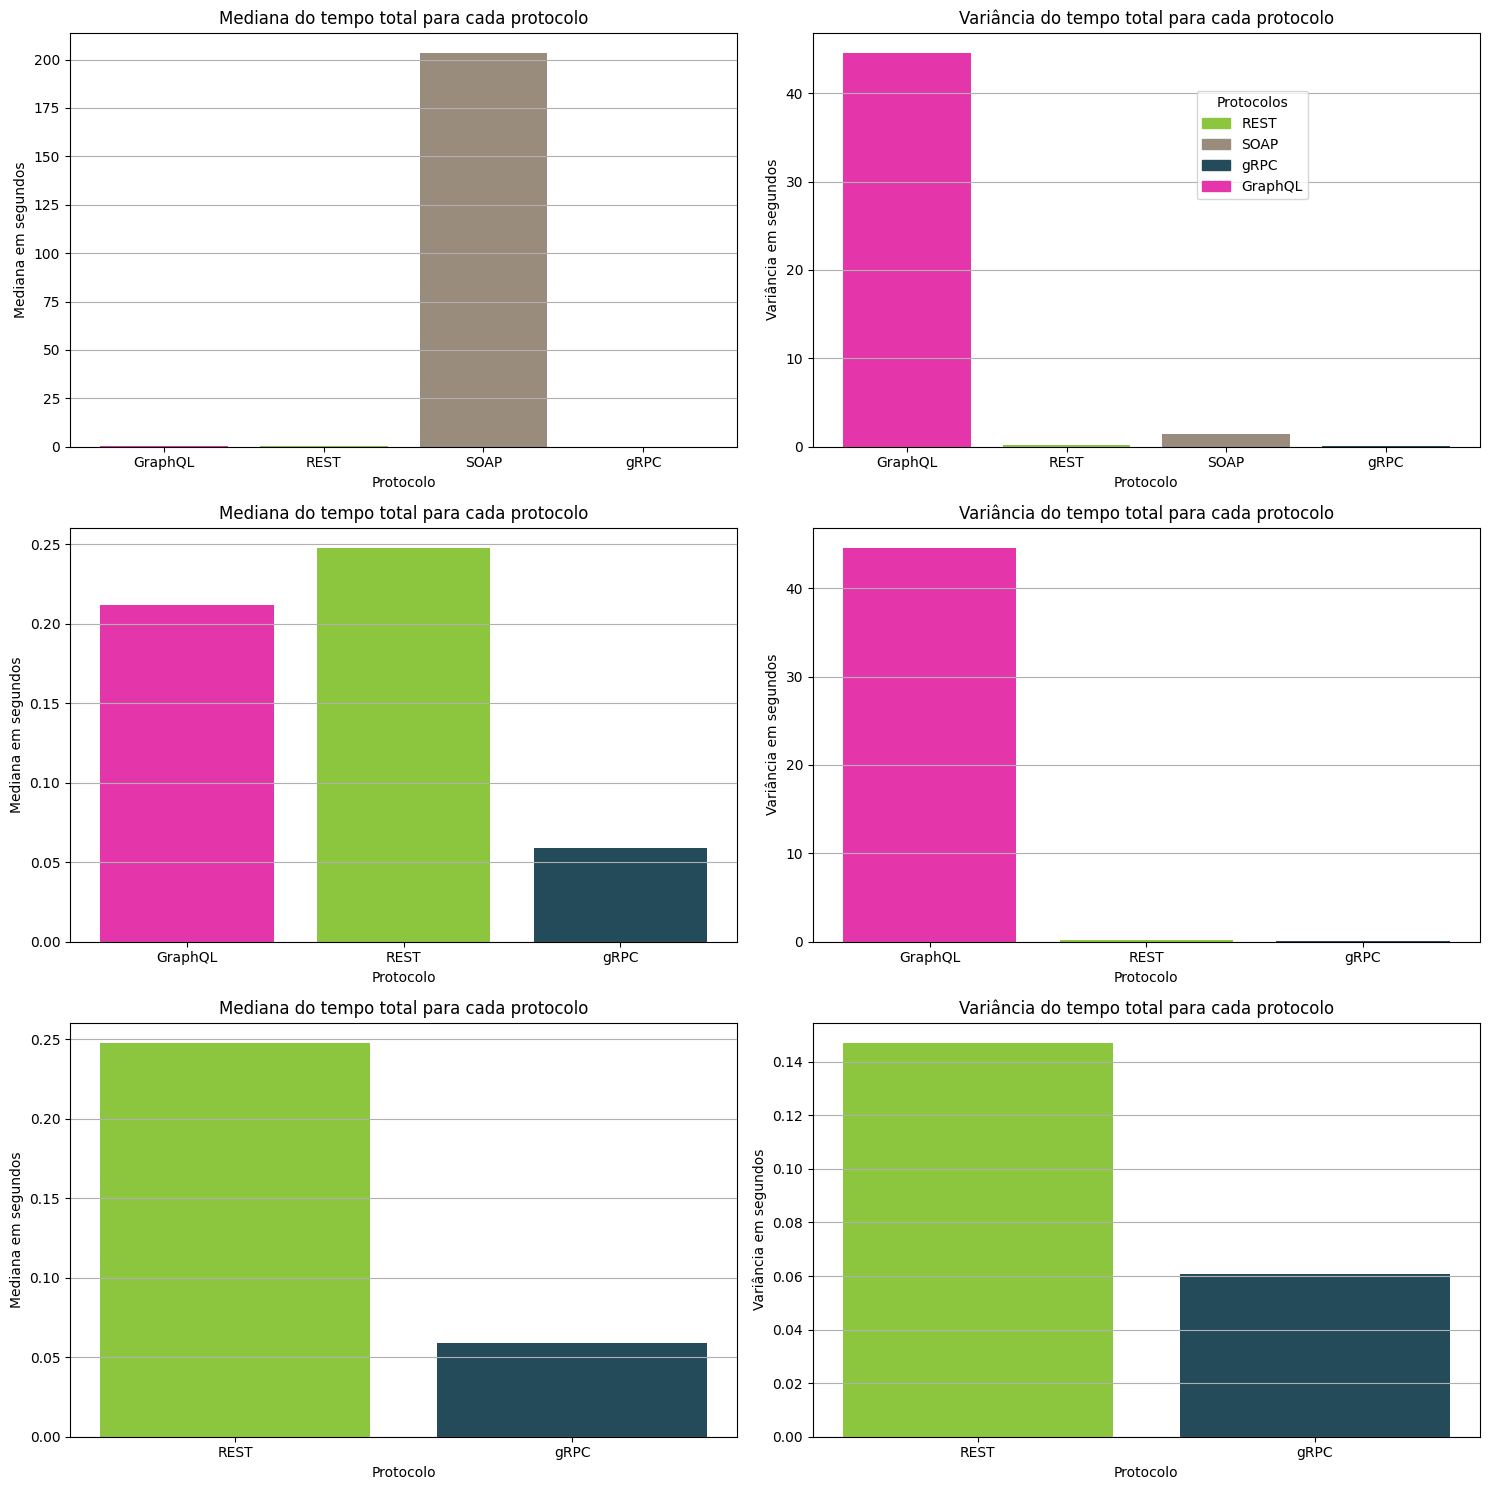

In [136]:
data_for_subplots = [
    (
        median_total_time_per_protocol,
        variance_total_time_per_protocol,
        "Todos os protocolos",
        ["#e535ab", "#8cc63f", "#9a8c7c", "#244b5a"],
    ),
    (
        median_total_time_per_protocol_no_soap,
        variance_total_time_per_protocol_no_soap,
        "Sem SOAP",
        ["#e535ab", "#8cc63f", "#244b5a"],
    ),
    (
        median_total_time_per_protocol_no_soap_no_graphql,
        variance_total_time_per_protocol_no_soap_no_graphql,
        "Sem SOAP e GraphQL",
        ["#8cc63f", "#244b5a"],
    ),
]

fig, axs = plt.subplots(3, 2, figsize=(15, 15))

for i, (data_median, data_var, protocols_used, bar_colors) in enumerate(
    data_for_subplots
):

    x_label = "Protocolo"
    y_label = "Segundos"

    axs[i, 0].bar(
        data_median["Protocol"],
        data_median["Total Time (s)"],
        color=bar_colors,
    )
    axs[i, 0].set_xlabel(x_label)
    axs[i, 0].set_ylabel("Mediana em segundos")
    axs[i, 0].set_title("Mediana do tempo total para cada protocolo")

    axs[i, 1].bar(
        data_var["Protocol"],
        data_var["Total Time (s)"],
        color=bar_colors,
    )
    axs[i, 1].set_xlabel(x_label)
    axs[i, 1].set_ylabel("Variância em segundos")
    axs[i, 1].set_title("Variância do tempo total para cada protocolo")

    axs[i, 0].grid(axis="y")
    axs[i, 1].grid(axis="y")


fig.legend(
    labels_for_legends,
    protocols,
    loc="center right",
    title="Protocolos",
    bbox_to_anchor=(0.88, 0.90),
)

plt.tight_layout()
plt.show()